In [41]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

import util

In [2]:
util.show_tf_info(tf)

TF Version: 2.6.2
Logical Devices: [LogicalDevice(name='/device:CPU:0', device_type='CPU')]
Physical Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


2022-02-13 02:31:25.744659: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-13 02:31:25.744683: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-13 02:31:25.744698: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (5c6edf48fe91): /proc/driver/nvidia/version does not exist
2022-02-13 02:31:25.744893: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [73]:
EPOCHS = 200
BATCH_SIZE = 128
VERBOSE = 1
NUM_CLASSES = 10 # number of digits 0..9
N_HIDDEN = 128
VALIDATION_SPLIT = .2 # portion of train data reserved for validation
DROP_OUT = 0.3

In [4]:
def show_stats(name, v):
    print(f"{name}.shape: {v.shape} dtype: {v.dtype}, min: {v.min()}, max: {v.max()}, mean: {v.mean()}")
    

In [5]:
# load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# reshape the X into 2D, convert to float32, normalize by dividing by 255 
x_train, x_test = (x.reshape(x.shape[0], -1).astype(np.float32)/255 for x in (x_train, x_test))
show_stats("x_train", x_train)
show_stats("x_test", x_test)

# One hot encode Y
y_train, y_test = (tf.keras.utils.to_categorical(y, NUM_CLASSES) for y in (y_train, y_test))
show_stats("y_train", y_train)
show_stats("y_test", y_test)

11501568/11490434 [==============================] - 1s 0us/step
x_train.shape: (60000, 784) dtype: float32, min: 0.0, max: 1.0, mean: 0.13066062331199646
x_test.shape: (10000, 784) dtype: float32, min: 0.0, max: 1.0, mean: 0.13251467049121857
y_train.shape: (60000, 10) dtype: float32, min: 0.0, max: 1.0, mean: 0.10000000149011612
y_test.shape: (10000, 10) dtype: float32, min: 0.0, max: 1.0, mean: 0.10000000149011612


In [74]:
# Build the model
model = tf.keras.models.Sequential(name='MNIST-2H')
for layer in [
    tf.keras.layers.Dense(N_HIDDEN, name='hidden_layer_01', input_shape=(x_train.shape[1],),  activation='relu'),
    tf.keras.layers.Dropout(DROP_OUT),
    tf.keras.layers.Dense(N_HIDDEN, name='hidden_layer_02', activation='relu'),
    tf.keras.layers.Dropout(DROP_OUT),
    tf.keras.layers.Dense(N_HIDDEN, name='hidden_layer_03', activation='relu'),
    tf.keras.layers.Dropout(DROP_OUT),
    tf.keras.layers.Dense(NUM_CLASSES, name='ouput_layer', activation='softmax'),
]: model.add(layer)

# compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "MNIST-2H"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_01 (Dense)      (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
hidden_layer_02 (Dense)      (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden_layer_03 (Dense)      (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
ouput_layer (Dense)          (None, 10)                129

In [75]:
%%time

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/200
375/375 [==============================] - 1s 2ms/step - loss: 2.0407 - accuracy: 0.3084 - val_loss: 1.3782 - val_accuracy: 0.7357
Epoch 2/200
375/375 [==============================] - 1s 1ms/step - loss: 1.2518 - accuracy: 0.5947 - val_loss: 0.6445 - val_accuracy: 0.8514
Epoch 3/200
375/375 [==============================] - 1s 2ms/step - loss: 0.8645 - accuracy: 0.7202 - val_loss: 0.4710 - val_accuracy: 0.8756
Epoch 4/200
375/375 [==============================] - 1s 1ms/step - loss: 0.7016 - accuracy: 0.7791 - val_loss: 0.3934 - val_accuracy: 0.8910
Epoch 5/200
375/375 [==============================] - 1s 1ms/step - loss: 0.6121 - accuracy: 0.8106 - val_loss: 0.3537 - val_accuracy: 0.9007
Epoch 6/200
375/375 [==============================] - 1s 1ms/step - loss: 0.5546 - accuracy: 0.8306 - val_loss: 0.3247 - val_accuracy: 0.9078
Epoch 7/200
375/375 [==============================] - 1s 1ms/step - loss: 0.5113 - accuracy: 0.8473 - val_loss: 0.3010 - val_accuracy: 0.9143

In [76]:
%%time 

model.evaluate(x_test, y_test)

df = pd.DataFrame(history.history)
sns.lineplot(data=df[['accuracy', 'val_accuracy']])

313/313 [==============================] - 0s 499us/step - loss: 0.0776 - accuracy: 0.9780
CPU times: user 233 ms, sys: 21 ms, total: 254 ms
Wall time: 188 ms


[0.07762116938829422, 0.9779999852180481]

<AxesSubplot:>

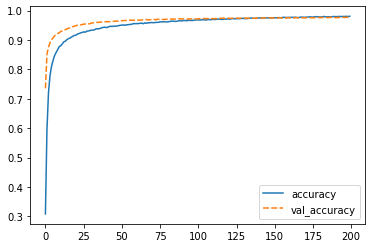

In [81]:
# Build the model
model = tf.keras.models.Sequential(name='MNIST-2H')
for layer in [
    tf.keras.layers.Dense(N_HIDDEN, name='hidden_layer_01', input_shape=(x_train.shape[1],),  activation='relu'),
    tf.keras.layers.Dropout(DROP_OUT),
    tf.keras.layers.Dense(N_HIDDEN, name='hidden_layer_02', activation='relu'),
    tf.keras.layers.Dropout(DROP_OUT),
    tf.keras.layers.Dense(N_HIDDEN, name='hidden_layer_03', activation='relu'),
    tf.keras.layers.Dropout(DROP_OUT),
    tf.keras.layers.Dense(NUM_CLASSES, name='ouput_layer', activation='softmax'),
]: model.add(layer)

# compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "MNIST-2H"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_01 (Dense)      (None, 128)               100480    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden_layer_02 (Dense)      (None, 128)               16512     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden_layer_03 (Dense)      (None, 128)               16512     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
ouput_layer (Dense)          (None, 10)                129

In [82]:
%%time

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/200
375/375 [==============================] - 1s 2ms/step - loss: 0.5799 - accuracy: 0.8196 - val_loss: 0.1818 - val_accuracy: 0.9463
Epoch 2/200
375/375 [==============================] - 1s 2ms/step - loss: 0.2497 - accuracy: 0.9266 - val_loss: 0.1382 - val_accuracy: 0.9592
Epoch 3/200
375/375 [==============================] - 1s 2ms/step - loss: 0.1960 - accuracy: 0.9427 - val_loss: 0.1202 - val_accuracy: 0.9664
Epoch 4/200
375/375 [==============================] - 1s 1ms/step - loss: 0.1622 - accuracy: 0.9530 - val_loss: 0.1038 - val_accuracy: 0.9703
Epoch 5/200
375/375 [==============================] - 1s 2ms/step - loss: 0.1427 - accuracy: 0.9585 - val_loss: 0.1000 - val_accuracy: 0.9728
Epoch 6/200
375/375 [==============================] - 1s 2ms/step - loss: 0.1314 - accuracy: 0.9617 - val_loss: 0.0941 - val_accuracy: 0.9732
Epoch 7/200
375/375 [==============================] - 1s 2ms/step - loss: 0.1177 - accuracy: 0.9655 - val_loss: 0.0924 - val_accuracy: 0.9737

313/313 [==============================] - 0s 500us/step - loss: 0.3100 - accuracy: 0.9772
CPU times: user 307 ms, sys: 40 ms, total: 347 ms
Wall time: 390 ms


<AxesSubplot:>

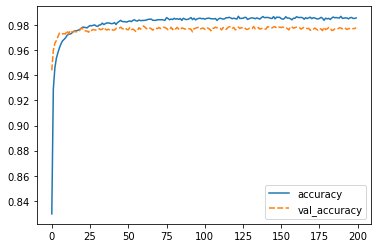

In [80]:
%%time 

model.evaluate(x_test, y_test)

df = pd.DataFrame(history.history)
sns.lineplot(data=df[['accuracy', 'val_accuracy']])